<a href="https://colab.research.google.com/github/MaureenGatu/Autolib-Electric-Car-Shaing/blob/main/AUTOLIB_ELECTRIC_CAR_SHARING_SERVICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTOLIB ELECTRIC CAR SHARING SERVICE**


#Defining the Question

##a) Specifying the question

This study seeks to analysis Blue cars used in Paris under Autolib Electric car sharing service.

##b) Defining the Metric for Success

Analyze and understand the performance of Blu cars acroos different regions and time periods.

##c) Recording the Experimental Design



 1. Loading the Data.

2. Checking the Data.

3.  Data Cleaning

4.  Exploratory Data analysis

5.  Hypothesis Testing.

6.  Conclusions and Recommendations



#LOADING THE DATA

In [ ]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import  pyplot as py
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Uploading the data

In [ ]:
#loading the datasets

autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

#data description

desc = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')


#Checking the data

In [ ]:
#Descrption of the dataframe

desc

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
#Preview of the top 5 row of the data

autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Preview of the bottom five rows of the data

autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# shape of the dataframe
print(f'shape of the data : {autolib.shape}')

shape of the data : (16085, 13)


In [ ]:
#Column information and data types

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Data Cleaning

In [ ]:
#check for null values
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing values in the datset.

In [ ]:
#replace 'Nan' with 0, under the assumption that Nan meant none
cols = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']
for i in cols:
  autolib[i].replace(to_replace=np.nan,value=0,inplace=True)

In [ ]:
# Change the data in the date column to date type


# confirm changes have be made
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Checking if there are outliers using Inter Quatile Range(IQR)
Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64


In [ ]:
#removing the outliers

autolib[cols] = autolib[cols][~((autolib[cols] < (Q1 - 1.5 * IQR)) |(autolib[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

#checking the shaoe after removing outliers
print(f'New shape of data frame , {autolib.shape}')

New shape of data frame , (16085, 13)


In [ ]:
Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
IQR1 = Q3 - Q1
print(IQR1)

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum          58.0
BlueCars_returned_sum       57.0
Utilib_taken_sum             2.0
Utilib_returned_sum          2.0
Utilib_14_taken_sum          5.0
Utilib_14_returned_sum       5.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64


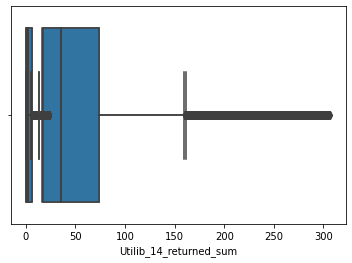

In [ ]:
#checking for outliers in the data
import seaborn as sns

for i in cols:
  sns.boxplot(x=autolib.loc[:,i])
 

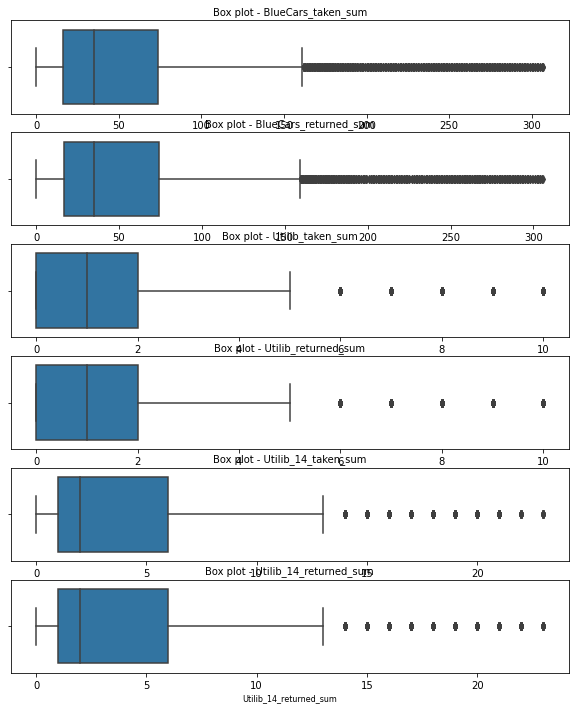

In [ ]:

# Checking for Anomalies
# 
# Checking for outliers in the columns with numerical data


fig, ax = plt.subplots(len(cols), figsize=(10,12))

for i, col_val in enumerate(cols):
    sns.boxplot(autolib[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

#Eploratory Analysis

##Univariate Analysis

###Measures of Dispersion

In [ ]:
#obtain data descriptive statistics
autolib[cols].describe()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum
count,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000,13454.000000
mean,56.582949,56.566226,1.642411,1.638546,3.952653,3.948788
std,59.241123,59.013290,2.077418,2.064291,4.432575,4.424005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,17.000000,0.000000,0.000000,1.000000,1.000000
50%,35.000000,35.000000,1.000000,1.000000,2.000000,2.000000
75%,74.000000,74.000000,2.000000,2.000000,6.000000,6.000000
max,307.000000,306.000000,10.000000,10.000000,23.000000,23.000000


In [ ]:
columns = ['BlueCars_taken_sum' , 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum' , 'Slots_taken_sum']                        

In [ ]:
#Frequency dustribution
for i in columns:
  print(f'Frequency: {i}')
  print(autolib[i].value_counts().sort_values(ascending=False))
  print(' ')
  print('....'*20)

Frequency: BlueCars_taken_sum
12.0     261
14.0     253
9.0      247
11.0     246
10.0     238
        ... 
212.0      2
232.0      1
298.0      1
261.0      1
195.0      1
Name: BlueCars_taken_sum, Length: 308, dtype: int64
 
................................................................................
Frequency: BlueCars_returned_sum
13.0     260
12.0     254
10.0     249
9.0      243
11.0     242
        ... 
221.0      1
287.0      1
300.0      1
306.0      1
299.0      1
Name: BlueCars_returned_sum, Length: 305, dtype: int64
 
................................................................................
Frequency: Utilib_taken_sum
0.0     5437
1.0     2935
2.0     1748
3.0     1140
4.0      750
5.0      520
6.0      360
7.0      228
8.0      181
9.0      108
10.0      47
Name: Utilib_taken_sum, dtype: int64
 
................................................................................
Frequency: Utilib_returned_sum
0.0     5377
1.0     2989
2.0     1807
3.0     1096
4.0 

In [ ]:
# skewness and kurtosis of the data
for i in cols:
  print(i)
  print(f'skewness:  {autolib[i].skew()}')
  print(f'Kurtosis:  {autolib[i].kurt()}')
  print(' ')
  s= abs(autolib[i].skew())
  if s > 1:
    print('highly skewed distribution')
  else:
    print('')
  k = autolib[i].kurt()
  if k >3:
    print('the distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('Distribution is light tailed')
  print(' ')
  print('....'*20)

BlueCars_taken_sum
skewness:  1.8799589630583085
Kurtosis:  3.5185214984894615
 
highly skewed distribution
the distribution is heavy-tailed(leptokutic)
 
................................................................................
BlueCars_returned_sum
skewness:  1.8837766850471496
Kurtosis:  3.5255197447193782
 
highly skewed distribution
the distribution is heavy-tailed(leptokutic)
 
................................................................................
Utilib_taken_sum
skewness:  1.57048730329367
Kurtosis:  2.1595504913485244
 
highly skewed distribution
Distribution is light tailed
 
................................................................................
Utilib_returned_sum
skewness:  1.5767899440798956
Kurtosis:  2.1899135369889513
 
highly skewed distribution
Distribution is light tailed
 
................................................................................
Utilib_14_taken_sum
skewness:  1.6140713206793094
Kurtosis:  2.4959450616826397
 
highly

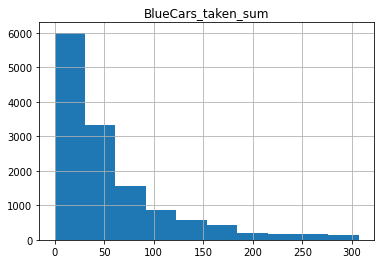

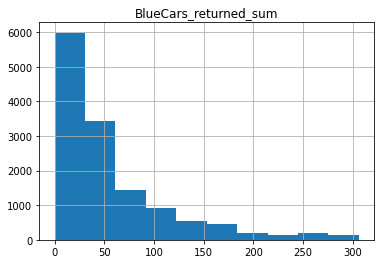

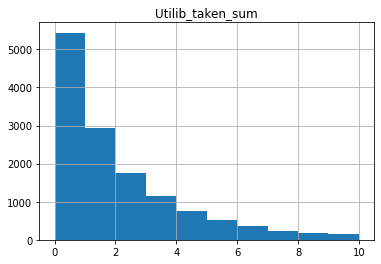

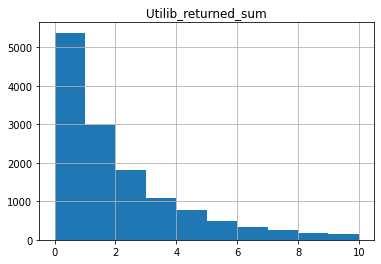

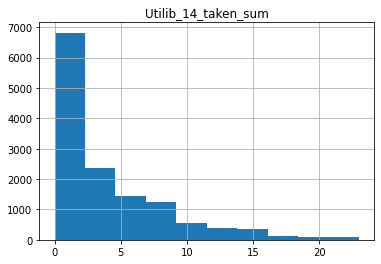

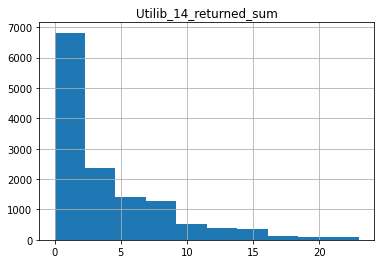

In [ ]:
#histogram plots
for i in cols:
  autolib.hist(i)

##Univariete Visualizations

Text(0.5, 1.0, 'Blue car usage between weekday and weekend')

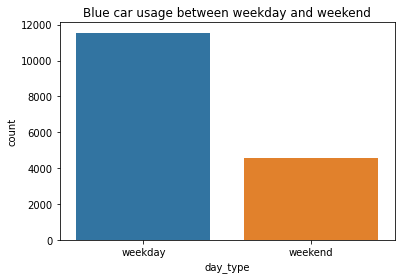

In [ ]:
# let us plot a chart to show comparison of blue car usage between weekday and weekend
sns.countplot(x='day_type', data=autolib)
plt.title('Blue car usage between weekday and weekend')

# The blue cars are Popular more on weekdays than on weekends.

In [ ]:
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

Text(0.5, 1.0, 'Blue car usage From Monday to Friday')

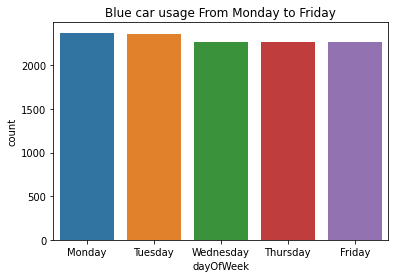

In [ ]:
#Blue car popularity during the specific weekdays
#convert the day of week column from numericals to strings


autolib['dayOfWeek'] = autolib.dayOfWeek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                    3: 'Thursday', 4: 'Friday'})

#plot of blue car used from monday to friday
sns.countplot(x='dayOfWeek', data=autolib)
plt.title('Blue car usage From Monday to Friday')

Text(0.5, 1.0, 'Blue car usage by month')

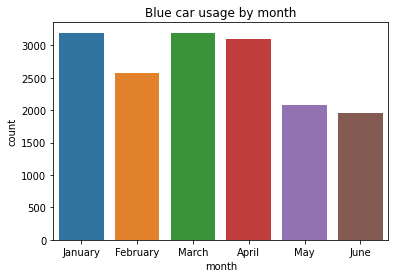

In [ ]:
# To analyse Blue car Usage by month
#step 1 : change date column to datetime type
autolib['date'] = pd.to_datetime(autolib['date'])

#create  a month column extracted from the date column
autolib['month'] = pd.DatetimeIndex(autolib['date']).month

#convert the month column from numericals to strings
autolib['month'] = autolib.month.map({1: 'January', 2: 'February', 3: 'March', 
                                    4: 'April', 5: 'May', 6 :'June'})

#plot the data based on months
sns.countplot(x='month', data=autolib)
plt.title('Blue car usage by month')

###Time series Graph

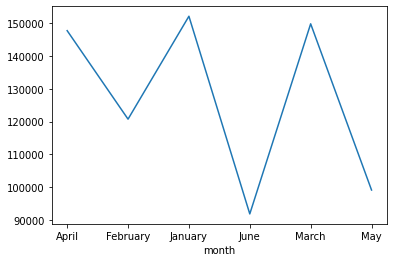

In [ ]:
#make a copy of our data to use in time series analysis
ts = autolib.copy()

# set date as index
ts = ts.set_index('date')

#plot of Blues cars taken
%matplotlib inline
d = ts.groupby('month').sum()
d1 = d['BlueCars_taken_sum']
d1.plot()

##Bivariate Analysis

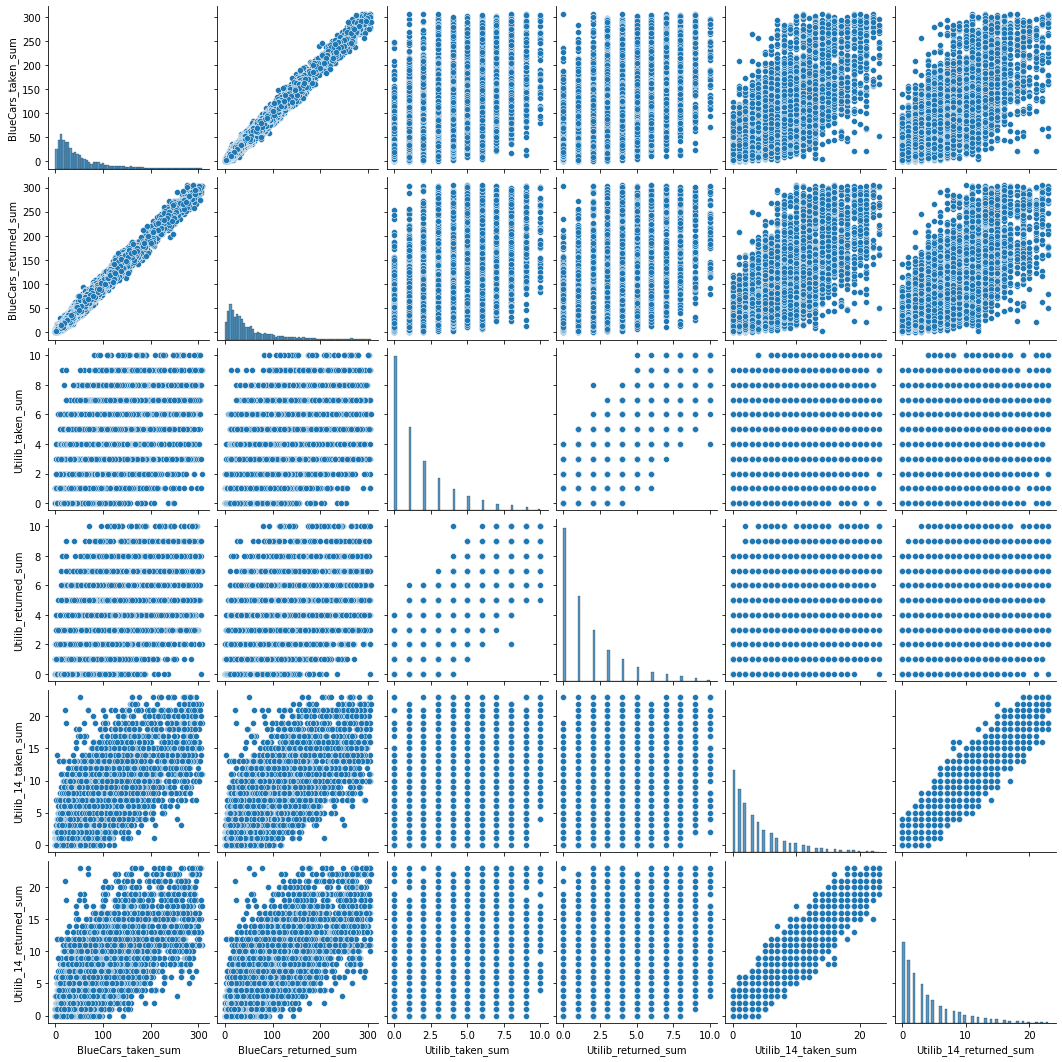

In [ ]:
# Ploting the bivariate summaries and recording our observation

sns.pairplot(autolib[cols])

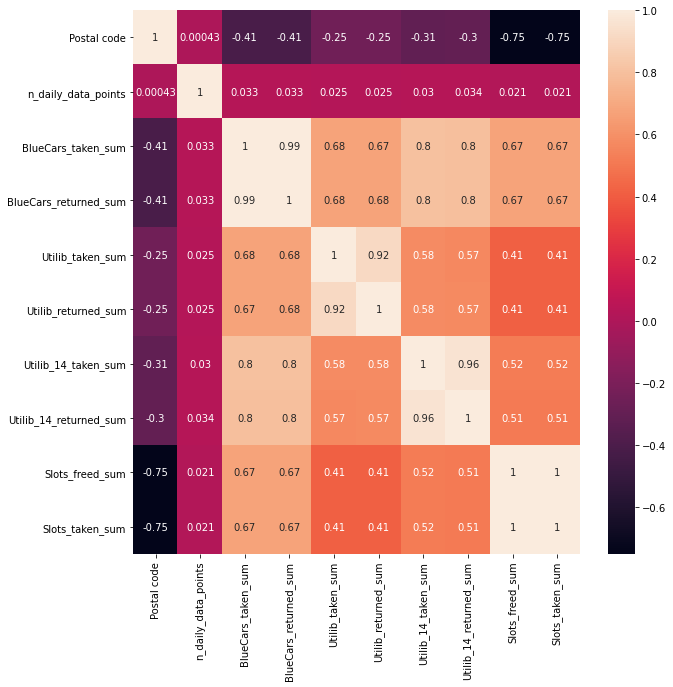

In [ ]:
#correlation heatmap

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(autolib.corr(),annot=True)
plt.show()



#Hypothesis Testing

In [ ]:
# postal code Stratified sample to ensure that every location is equally represented

hpts = autolib.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
hpts

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,month
33,75001,2018-02-03,1438,NaN,weekend,199.0,204.0,4.0,4.0,15.0,15.0,34,37,February
124,75001,2018-05-08,1425,Tuesday,weekday,157.0,156.0,0.0,0.0,1.0,1.0,30,30,May
119,75001,2018-05-03,1439,Thursday,weekday,138.0,138.0,2.0,2.0,9.0,9.0,26,26,May
6,75001,2018-01-07,1440,NaN,weekend,180.0,180.0,2.0,2.0,10.0,9.0,34,34,January
60,75001,2018-03-05,1440,Monday,weekday,102.0,103.0,1.0,1.0,12.0,12.0,21,19,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16077,95880,2018-06-12,1439,Tuesday,weekday,25.0,25.0,0.0,0.0,0.0,0.0,0,0,June
15944,95880,2018-01-16,1440,Tuesday,weekday,11.0,12.0,0.0,0.0,0.0,0.0,0,0,January
16028,95880,2018-04-13,1439,Friday,weekday,20.0,16.0,0.0,0.0,1.0,1.0,0,0,April
16065,95880,2018-05-31,1411,Thursday,weekday,12.0,17.0,0.0,0.0,0.0,0.0,0,0,May


In [ ]:
# checking the that the sample is representative of the dataset
print(autolib.shape)
print(hpts.shape)
print(autolib['Postal code'].nunique())
print(hpts['Postal code'].nunique())

(16085, 14)
(1648, 14)
104
104


In [ ]:
#Ho :   Mean of Taken blue cars for the month of  January is equal to the Mean of Taken blue cars for the month of April.
#      u1 = u2

#Ha :   Mean of Taken blue cars for the month of  January is  not equal to the Mean of Taken blue cars for the month of April.
#      u1 ≠ u2


In [ ]:
#To test the hypothesis will first define our taget populations from the 2 time periods.

Jan = hpts[hpts.month =='January'] 
June = hpts[hpts.month =='June'] 
June

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,month
140,75001,2018-06-04,1440,Monday,weekday,99.0,95.0,1.0,1.0,16.0,16.0,11,11,June
299,75002,2018-06-07,1439,Thursday,weekday,152.0,153.0,8.0,8.0,12.0,12.0,31,30,June
451,75003,2018-06-03,1440,NaN,weekend,NaN,NaN,NaN,NaN,NaN,NaN,81,89,June
614,75004,2018-06-10,1440,NaN,weekend,287.0,288.0,9.0,9.0,17.0,17.0,57,55,June
617,75004,2018-06-13,1440,Wednesday,weekday,144.0,142.0,4.0,5.0,14.0,14.0,29,28,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15769,95100,2018-06-16,1440,NaN,weekend,26.0,26.0,0.0,0.0,0.0,2.0,0,0,June
15756,95100,2018-06-03,1440,NaN,weekend,38.0,33.0,3.0,4.0,1.0,2.0,0,0,June
15911,95870,2018-06-02,1440,NaN,weekend,18.0,25.0,1.0,0.0,0.0,1.0,0,0,June
16070,95880,2018-06-05,1439,Tuesday,weekday,4.0,6.0,0.0,0.0,2.0,1.0,0,0,June


In [ ]:
# We then implement random sampling to obtain the samples to be used in the hypothesis testing.
sample1 = Jan.sample(n=28, random_state = 10)

sample2 = June.sample(n=28, random_state=10)


In [ ]:
col = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']
for i in col:
  sample1[i].replace(to_replace=np.nan,value=0,inplace=True)
  sample2[i].replace(to_replace=np.nan,value=0,inplace=True)

sample1['BlueCars_taken_sum'].unique()

array([ 83.,  46.,  14.,  26.,  17., 296.,  11.,  55.,  45.,  12.,   0.,
         5.,  44.,  10.,  27.,  23.,  20.,  91.,  42.,   4.,  56.])

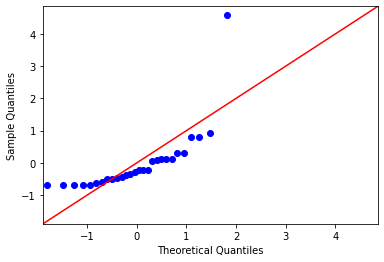

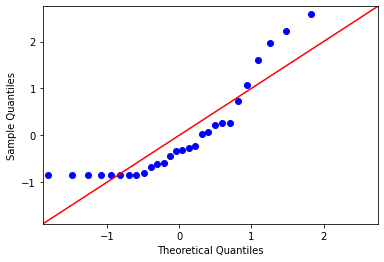

In [ ]:
# Next is to test the nomarlty of our data
# this is done by using a qq plot
import statsmodels.api as sm
# a qq plot of sample 1
fig = sm.qqplot(sample1['BlueCars_taken_sum'], fit = True, line= '45')
plt.show()

# a qq plot of sample 2
fig = sm.qqplot(sample2['BlueCars_taken_sum'], fit = True, line= '45')
plt.show()

In [ ]:
# let us perfrom our ttest
from scipy import stats


#stats.ttest_ind(sample1['BlueCars_taken_sum'], sample2['BlueCars_taken_sum'])
tstat, pval = stats.ttest_rel(sample1['BlueCars_taken_sum'], sample2['BlueCars_taken_sum'])
print(f't statistic :  {tstat}')
print(f'p value :      {pval}')
if pval < 0.05:
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")

t statistic :  -0.5283635854298803
p value :      0.6015634003018815
Do not reject null hypothesis


Using the two sample t-test

In [ ]:
#mean of Jan
import statistics
col = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']
for i in col:
  Jan[i].replace(to_replace=np.nan,value=0,inplace=True)
  June[i].replace(to_replace=np.nan,value=0,inplace=True)

meanJan = Jan['BlueCars_taken_sum'].mean()
stdJan = statistics.stdev(Jan['BlueCars_taken_sum'])
nJ = len(Jan['BlueCars_returned_sum'])

print(f'Mean of BlueCars taken in Jan                        :  {meanJan}')
print(f'Standard deviation of Blue cars taken in Jan         : {stdJan}')

Mean of BlueCars taken in Jan                        :  46.41463414634146
Standard deviation of Blue cars taken in Jan         : 56.95928074390234


In [ ]:
#mean of Blue cars taken in June
import statistics

meanJune = June['BlueCars_returned_sum'].mean()
stdJune = statistics.stdev(June['BlueCars_taken_sum'])
nA = len(June['BlueCars_returned_sum'])

print(f'Mean of Blue cars taken in April               :  {meanJune}')
print(f'Standard deviation of Blue cars taken in April : {stdJune}')

Mean of Blue cars taken in April               :  46.69458128078818
Standard deviation of Blue cars taken in April : 53.182807494739166


In [ ]:
import math
num = meanJan - meanJune
s1 = stdJan**2
s2 = stdJune**2

denom =math.sqrt((s1/nA)+ (s2/nJ))
tcalc  = num/denom
print(tcalc)

# t critical at 95% confidence interval is 1.833
Tcric = 1.833
if tcalc > Tcric:
  print('Value is in the rejection region')
  print('Reject nul hypothesis')
else:
  print('Value fall in the acceptance region')
  print('Do not reject null hypothesis')

-0.0564367432926433
Value fall in the acceptance region
Do not reject null hypothesis


In [ ]:
import scipy.stats

#find p-value
pval = scipy.stats.norm.sf(tcalc)
print(pval)
if pval < 0.05:
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")

0.5225030566638753
Do not reject null hypothesis


In [92]:
#Point Estimate
point_estimate = meanJan - meanJune
point_estimate

-0.27994713444671504


The point estimate shows that the average number of bluecars taken for the month of January is approximately 2.78 points higher than the number of bluecars taken fin the month of June.

In [94]:
#test sensitivity

import statistics

sen = autolib.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.3))
 
Jans = sen[sen.month =='January'] 
Junes = sen[sen.month =='June']

col = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum']
for i in col:
  Jans[i].replace(to_replace=np.nan,value=0,inplace=True)
  Junes[i].replace(to_replace=np.nan,value=0,inplace=True)

sample1s = Jans.sample(n=28, random_state = 20)

sample2s = Junes.sample(n=28, random_state=20)

tstat, pval = stats.ttest_rel(sample1s['BlueCars_taken_sum'], sample2s['BlueCars_taken_sum'])
print(f't statistic :  {tstat}')
print(f'p value :      {pval}')
if pval < 0.05:
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")

t statistic :  0.7885836392774996
p value :      0.43722507005754596
Do not reject null hypothesis



#Conclusion

Even though the graphical representation showed that there were more cars picked in the month of January than in June, the hypothesis test showed that there is no statistically significant difference in means of the two time periods. We can therefore assume that the popularity of the blue cars was not grow, i.e the market was appears to have been stagnant over the time period.